In [2]:
import matplotlib.pyplot as plt
import numpy as np
import iris as ir
import iris.plot as iplt
import iris.coord_categorisation 
import nc_time_axis 
import cftime as cf
%matplotlib inline

/home/dennisonfw/miniconda2/envs/notebk/lib/python2.7/site-packages/cf_units/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from cf_units import _udunits2 as _ud
/home/dennisonfw/miniconda2/envs/notebk/lib/python2.7/site-packages/cartopy/crs.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from cartopy._crs import CRS, Geodetic, Globe, PROJ4_VERSION
/home/dennisonfw/miniconda2/envs/notebk/lib/python2.7/site-packages/mo_pack/__init__.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._packing import (compress_rle, compress_wgdos,
/home/dennisonfw/miniconda2/envs/notebk/lib/python2.7/site-packages/cartopy/geodesic/__init__.py:21: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from cartopy.geodesic._geodesic import Geodesic  # noqa: F401


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

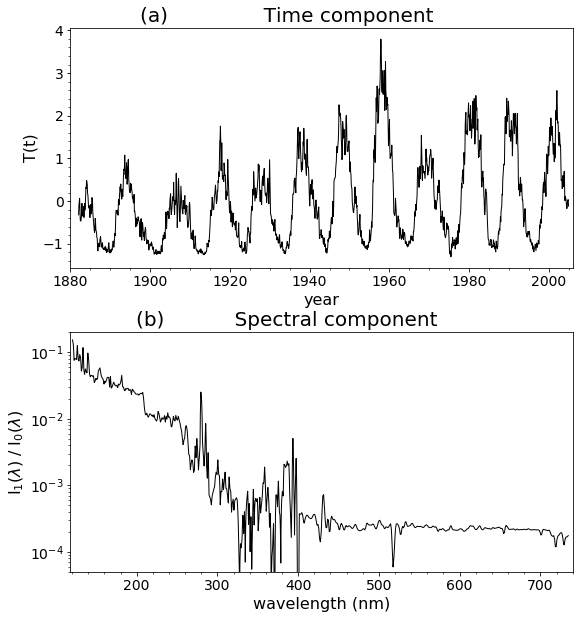

In [4]:
# Figure 1

f = open('/home/dennisonfw/svd_solar_data.txt','r')
lines = f.readlines()
f.close()

lmbda = []
i_lmbda = []
t = []
i_t = []
for line in lines :
    line = line.split()
    x = float(line[0])
    y = float(line[1]) 
    if (x<1000.) & (y!=0.0):
        lmbda.append(x)
        i_lmbda.append(y)
    elif (x>1880.) & (x<2005.) & (y!=0.0):
        t.append(x)
        i_t.append(y)        
        
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(9,10))
plt.subplot(ax1)
plt.plot(t,i_t, linewidth = 1, color='k')      
plt.ylabel(r"T(t)",fontsize=16)
plt.xlim([1880,2006])
plt.xlabel('year',fontsize=16)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(r"(a)               Time component           ",fontsize=20)

plt.subplot(ax2)
ax2.plot(lmbda,i_lmbda, linewidth = 1, color='k')        
ax2.set_yscale('log') 
plt.ylabel(r"I$_1(\lambda)$ / I$_0(\lambda)$",fontsize=16)
plt.xlim([118,740])
plt.xlabel('wavelength (nm)',fontsize=16)
plt.ylim([5e-5,0.2])
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(r"(b)           Spectral component           ",fontsize=20)

plt.subplots_adjust(hspace=0.27)
    
plt.show()
#plt.savefig('figs/solar_cycle.png',bbox_inches='tight')

In [5]:
I = np.array([ -0.59726, -0.46140, -0.47398, -0.34808, -0.17502, -0.32683, -0.43965, -0.72550,
               -0.76022, -0.82485, -0.76242, -0.81803, -0.84071, -0.70684, -0.74037, -0.77737, 
               -0.73490, -0.70467, -0.76291, -0.89577, -0.95232, -0.89519, -0.93975, -0.97265,
               -1.02486, -0.97371, -1.02655, -1.10253, -1.04402, -1.15757, -1.17532, -1.18652,
               -1.10945, -1.09218, -1.06423, -1.00780, -1.07823, -1.15599, -1.05942, -0.97903,
               -1.05640, -1.07980, -1.02665, -1.00657, -0.91963, -0.97059, -0.99806, -0.83158,
               -0.56080, -0.63591, -0.48838, -0.42462, -0.45751, -0.51553, -0.33863, -0.12683,
               -0.19024, -0.07925,  0.22583,  0.39441,  0.44079,  0.19806,  0.43577,  0.67433, 
                0.48688,  0.40760,  0.33245,  0.10915,  0.66443,  1.10217,  1.08463,  1.07131, 
                0.64283,  0.89036,  1.28824,  1.06211,  1.08408,  1.32919,  1.72798,  1.70946, 
                1.41566,  1.48908,  1.94853,  1.60109,  1.62533,  1.54501,  1.74853,  1.55057,
                1.29531,  1.10254,  1.21484,  1.34697,  0.92536,  1.34261,  1.00394,  1.09606,
                1.93032,  2.12337,  1.90254,  2.38584,  2.58996,  2.29864,  1.83244,  1.86442,
                1.76346,  1.35683,  1.30800,  1.52975,  1.60932,  1.41029,  1.28089,  1.31180,
                0.95640,  0.48897,  0.51112,  0.49424,  0.29593,  0.38324,  0.59869,  0.48401,
                0.33769,  0.58933,  0.69858,  0.43426,  0.01689,  0.11365,  0.08297,  0.06327,
               -0.02308, -0.11596, -0.17203, -0.12599, -0.00629,  0.02732,  0.03696, -0.11419,
               -0.25886, -0.36564, -0.47476, -0.52496, -0.51282, -0.46201, -0.53532, -0.55132, 
               -0.49531, -0.52566, -0.62338, -0.67363, -0.75181, -0.82165, -0.87160, -0.82396, 
               -0.83348, -0.84198, -0.87023, -0.91958, -0.90854, -0.91508, -0.94395, -0.98024, 
               -1.04245, -1.08336, -1.10213, -1.06053, -1.09795, -1.09022, -1.05797, -0.99534, 
               -1.03970, -1.05269, -1.00742, -1.02723, -1.00018, -0.94697, -0.95126, -0.93608, 
               -0.84064, -0.87387, -0.90170, -0.80363, -0.71533, -0.71059, -0.62915, -0.56820, 
               -0.48981, -0.36944, -0.19299, -0.09935, -0.05510,  0.11991,  0.12998,  0.38464,  
                0.34863,  0.45233,  0.52327,  0.63555,  0.93744,  0.96046,  1.10646,  1.30055,  
                1.27462,  1.19190,  1.19855,  1.19758 ])

In [7]:
path = '/nesi/nobackup/dennisonfw/output/netcdf'

## Load O2 photoylsis rate
o2phot_sol = ir.load_cube(path+'/an973/an973_o2phot.nc')
x = ir.load_cube(path+'/ak990/ak990_o2phot.nc')
o2phot_cont = o2phot_sol.copy(data = x.data[:-2,:,:])
grid_areas = ir.analysis.cartography.area_weights(o2phot_cont)

In [16]:
## Load total column ozone
tco_sol = ir.load_cube(path+'/an973/an973_tco.nc')
x = ir.load_cube(path+'/ak990/ak990_tco.nc')
tco_cont = tco_sol.copy(data = x.data[:-2,:])

In [9]:
def movingmean(y,n):
    cumsum, moving_aves = [0], []

    for i, x in enumerate(y, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=n:
            moving_ave = (cumsum[i] - cumsum[i-n])/n
            moving_aves.append(moving_ave)

    return moving_aves

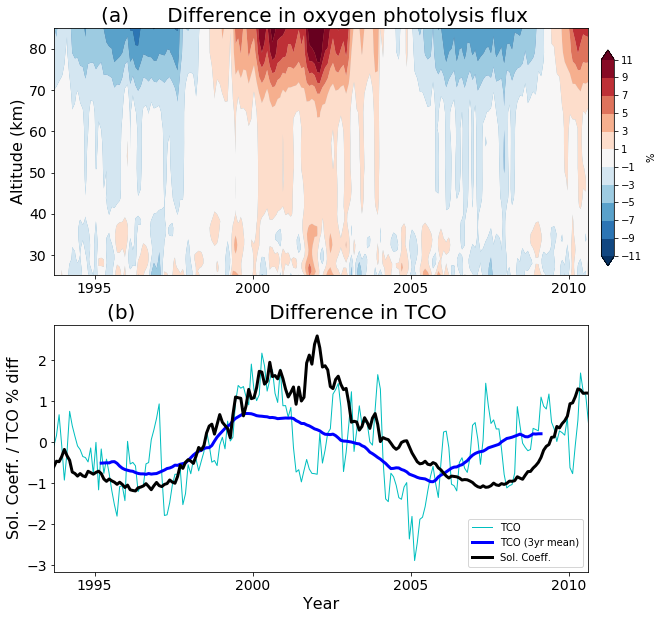

In [18]:
# Figure 2

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(9,10))
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.55, 0.02, 0.3])

plt.subplot(2,1,1)
gm_cont = o2phot_cont.collapsed(['latitude'],ir.analysis.MEAN, weights = grid_areas)
gm_sol = o2phot_sol.collapsed(['latitude'],ir.analysis.MEAN, weights = grid_areas)
diff_o2 = (gm_sol - gm_cont)/gm_cont *100
diff_o2.coord('level_height').points = diff_o2.coord('level_height').points/1000. #km

htconstr = ir.Constraint(model_level_number=lambda cell: cell>=60)
v = np.linspace(-11.0,11.0,12)
iplt.contourf(diff_o2.extract(htconstr), v, extend = 'both')
plt.set_cmap('RdBu_r')
cbar = plt.colorbar(orientation='vertical', cax=cbar_ax, label = '%')
cbar.set_ticks(v)

plt.title(r"(a)      Difference in oxygen photolysis flux  ",fontsize=20)
plt.ylabel('Altitude (km)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
 

def plot_tco(cubediff,cubebase,reg,regname) :
    x_reg = cubediff.extract(ir.Constraint(latitude=reg))
    ga_reg = ir.analysis.cartography.area_weights(x_reg)
    x_ts = x_reg.collapsed(['latitude'],ir.analysis.MEAN,weights=ga_reg)
    base = cubebase.extract(ir.Constraint(latitude=reg)).collapsed(['latitude'],ir.analysis.MEAN,weights=ga_reg)
    pctdiff = x_ts/base*100.
    iplt.plot(pctdiff, 'c', linewidth = 1, label=regname)
    smth = movingmean(pctdiff.data,37)

    cube2 = pctdiff.copy(data=np.concatenate([np.full(18, np.nan), smth, np.full(18, np.nan)]))
    iplt.plot(cube2, 'b', linewidth = 3, label='TCO (3yr mean)')   #+' smth' 
    return x_ts;


diff_tco = (tco_sol-tco_cont)
lat_eq = lambda c: -60. <= c <= 60.

plt.subplot(2,1,2)

ts = plot_tco(diff_tco,tco_cont,lat_eq,'TCO')
sol = ts.copy(data=I)

iplt.plot(sol,'k', linewidth = 3, label='Sol. Coeff.')
t1 = nc_time_axis.CalendarDateTime(cf.datetime(1993,9,16), '360_day')
t2 = nc_time_axis.CalendarDateTime(cf.datetime(2010,8,16), '360_day')
plt.xlim(t1,t2)
plt.title('(b)                     Difference in TCO              ',fontsize=20) 
plt.legend(loc='lower right')
plt.ylabel('Sol. Coeff. / TCO % diff',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()
#plt.savefig('figs/TCOdiff.png',bbox_inches='tight')